@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/uM4u7P2xkO8

# Juego: "Piedra, Papel o Tijera"
# Clasificación de Imágenes para Principiantes
# Red Neuronal Artificial (Perceptrón multicapa)
El perceptrón multicapa comúnmente se abrevia MLP por sus siglas en inglés (MultiLayer Perceptron)

### Librerías y versión de TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import pathlib
print(tf.__version__)

2.15.0


### Descargar Imágenes del Repositorio de GitHub de Código Máquina

Los imágenes que se encuentran en el repositorio de Código Máquina son una versión simplificada de las imágenes provistas por Julien de la Bruère-Terreault.

**Referencia**

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [2]:
url_datos = "https://github.com/CodigoMaquina/code/raw/main/datos/piedra_papel_tijera.zip"
archivo = tf.keras.utils.get_file(origin=url_datos, extract=True)
ruta = str(pathlib.Path(archivo)).replace(".zip", "")
print("Ruta donde están almacenadas las imágenes", ruta)

Ruta donde están almacenadas las imágenes /root/.keras/datasets/piedra_papel_tijera


### Cargar Imágenes de *Piedras*, *Papeles*, y *Tijeras*
Se asume que las imágenes están agrupadas por clase y que se encuentran en carpetas diferentes: *piedra*, *papel*,  *tijera*. Además, cada carpeta tiene imágenes cuyo nombre va de 0.png a 699.png indicando el número de imagen.

In [3]:
# Descripción de clases y su identificador
descripcion = ("papel", "piedra", "tijera")
clases = {"papel" : 0, "piedra" : 1, "tijera" : 2}

# Número de imágenes de cada clase
num_img_clase = 700

# Imágenes de Entrenamiento de cada clase: 490
# 70% de las imágenes de una clase = 490 imágenes
num_entrena = round(num_img_clase * 0.70)

# Imágenes de Prueba de cada clase: 210
# 30% de las imágenes de una clase = 210 imágenes
num_prueba = round(num_img_clase * 0.30)

# Creación de arreglos para almacenar datos de Entrenamiento para las 3 clases
# Las imágenes son de 30 (ancho) x 20 (alto)
imagenes_entrena = np.empty((num_entrena * len(clases), 20, 30), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

# Creación de arreglos para almacenar datos de Prueba para las 3 clases
imagenes_prueba = np.empty((num_prueba * len(clases), 20, 30), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Cargar datos de Entrenamiento: imágenes de la 0 a la 489
for i in range(num_entrena):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_entrena
    imagenes_entrena[indice_instancia] = np.array(imagen)
    clases_entrena[indice_instancia] = clases[clase]

# Cargar datos de Prueba: imágenes de la 490 a la 699
for i in range(num_entrena, num_img_clase):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_prueba - num_entrena
    imagenes_prueba[indice_instancia] = np.array(imagen)
    clases_prueba[indice_instancia] = clases[clase]

Otra opción para cargar las imágenes es tf.keras.utils.*image_dataset_from_directory(ruta,  image_size=(20, 30))* aunque requiere estar familiarizado con la clase PrefetchDataset de TensorFlow

# Visualización de algunas imágenes

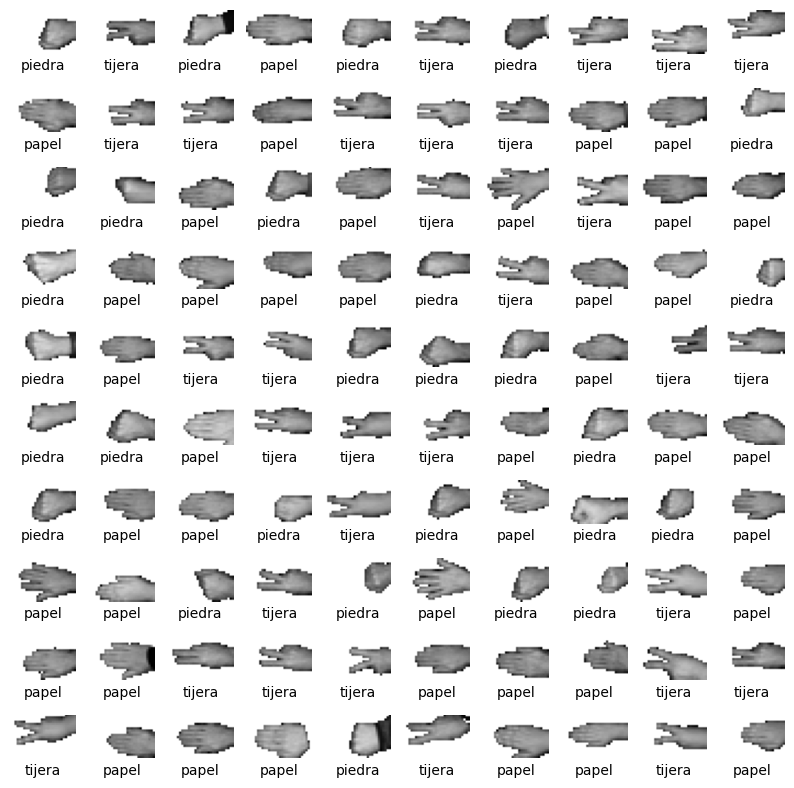

In [4]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Selección aleatoria de una imagen
    indice = random.randint(0, num_entrena*len(clases) - 1)
    plt.imshow(imagenes_entrena[indice], cmap="gray")
    plt.xlabel(descripcion[clases_entrena[indice]])
    plt.grid(False)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Visualización de una imagen arbitraria en tamaño grande

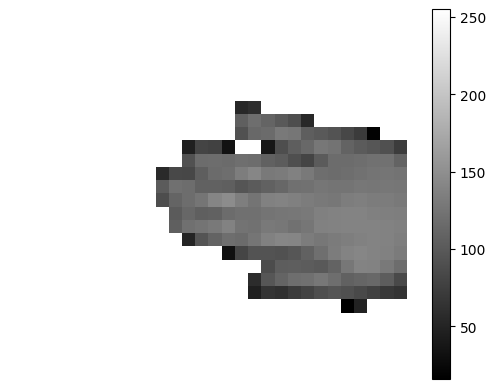

In [5]:
plt.figure()
plt.imshow(imagenes_prueba[102], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.box(False)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]

In [6]:
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Creación del modelo de la Red Neuronal Artificial (MLP)

In [7]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20, 30)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

# Cofigurar el Modelo para Entrenamiento

In [8]:
modelo.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

# Entrena el Modelo (es decir, la Red Neuronal Artificial)

In [9]:
modelo.fit(imagenes_entrena, clases_entrena, epochs=50)

Epoch 1/50
46/46 [==============================] - 2s 12ms/step - loss: 1.0907 - accuracy: 0.3864
Epoch 2/50
46/46 [==============================] - 1s 14ms/step - loss: 1.0057 - accuracy: 0.4918
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.9359 - accuracy: 0.5755
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.8882 - accuracy: 0.6218
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.8479 - accuracy: 0.6456
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8052 - accuracy: 0.6884
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7917 - accuracy: 0.6707
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7642 - accuracy: 0.7054
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.7218
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - loss: 0.7184 - accuracy: 0.7156
Epoch 11/50
46/46

# Evalúa el modelo (porcentaje de aciertos con datos de prueba)

In [10]:
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba):", exactitud)

20/20 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8603
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba): 0.8603174686431885


# Clasifica las Imágenes de Prueba con la Red Neuronal

In [11]:
predicciones = modelo.predict(imagenes_prueba)

20/20 [==============================] - 0s 2ms/step


# Salida de la Red Neuronal para cada Imagen de Prueba

In [12]:
# Creación de arreglo para almacenar predicciones
clase_predicha = np.empty(num_prueba * len(clases), dtype = "uint8")

for instancia in range(num_prueba * len(clases)):
  # almacena clase predicha para una imagen dada
  clase_predicha[instancia] = np.argmax(predicciones[instancia])
  if clase_predicha[instancia] == clases_prueba[instancia]:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ACERTÓ")
  else:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ERRÓ")

Probabilidades: [9.9610209e-01 3.3911907e-03 5.0659955e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.86097777 0.00713614 0.13188611] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9670132  0.00722246 0.02576425] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.96541375 0.02677206 0.00781424] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.30582312 0.48074022 0.21343668] Clase predicha: 1 Clase correcta: 0 La Red Neuronal ERRÓ
Probabilidades: [0.9771679  0.01317204 0.00965994] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.77476394 0.1186756  0.10656048] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.96927947 0.00181558 0.02890493] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.87416136 0.07158986 0.05424883] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Pro

# Matriz de Confusión: Resultado de Evaluación a Detalle

In [13]:
# papel : 0     piedra : 1     tijera : 2
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)
print("Matriz de Confusión:\n", matriz.numpy())

Matriz de Confusión:
 [[158  19  33]
 [  4 191  15]
 [  6  11 193]]
